In [2]:
import pickle
import pandas as pd
from sklearn.model_selection import train_test_split

with open('./white_black_eco/svm_classifier.pkl', 'rb') as model_file:
    classifier = pickle.load(model_file)
with open('./white_black_eco/standard_scaler.pkl', 'rb') as scaler_file:
    sc = pickle.load(scaler_file)
    
df = pd.read_csv('./Data/chess_numeric.csv')

value_counts = df['eco'].value_counts()
ecos_comunes = value_counts[value_counts > 100].index
filt = df['eco'].isin(ecos_comunes)
df = df.loc[filt]

X = df.loc[:, ["white_elo", "black_elo", "eco"]]
y = df['result']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

Accuracy for 500-700 ELO range: 0.8059701492537313
Accuracy for 700-900 ELO range: 0.6191135734072022
Accuracy for 900-1100 ELO range: 0.5736270368135185
Accuracy for 1100-1300 ELO range: 0.5530385354844103
Accuracy for 1300-1500 ELO range: 0.5463803102194844
Accuracy for 1500-1700 ELO range: 0.5448088842975206
Accuracy for 1700-1900 ELO range: 0.5524069875983465
Accuracy for 1900-2100 ELO range: 0.571989332694094
Accuracy for 2100-2300 ELO range: 0.5889830508474576
Accuracy for 2300-2500 ELO range: 0.6341331408984304
Accuracy for 2500-2700 ELO range: 0.6620180475799836
Accuracy for 2700-2900 ELO range: 0.6326530612244898
Accuracy for 2900-3100 ELO range: 0.6666666666666666


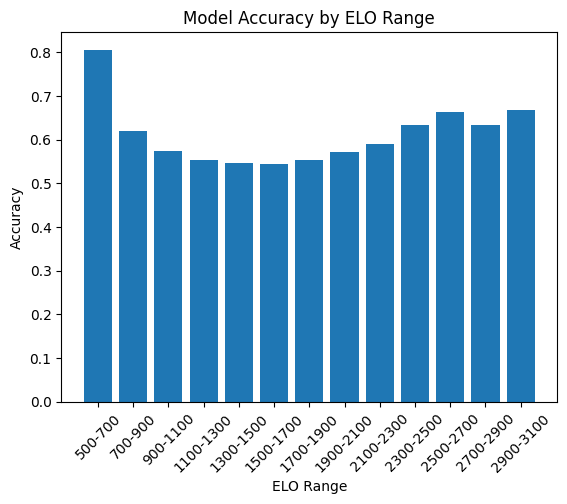

In [4]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Dividir el conjunto de prueba en subconjuntos según el nivel de ELO
elo_ranges = [i + 200 for i in range(300, 3000, 200)]
elo_labels = [f'{elo}-{elo+200}' for elo in elo_ranges]

elo_accuracy = {}

for i in range(len(elo_ranges) - 1):
    elo_min, elo_max = elo_ranges[i], elo_ranges[i + 1]
    
    filt = (X_test["white_elo"]>= elo_min) & (X_test["white_elo"]<elo_max)
    x_subset = X_test.loc[filt]
    y_subset = y_test.loc[filt]
    elo_subset_X = sc.transform(x_subset)
    elo_accuracy[elo_labels[i]] = accuracy_score(y_subset, classifier.predict(elo_subset_X))
    print(f'Accuracy for {elo_labels[i]} ELO range: {elo_accuracy[elo_labels[i]]}')
    
elo_labels, elo_accuracies = zip(*elo_accuracy.items())

plt.bar(elo_labels, elo_accuracies)
plt.xlabel('ELO Range')
plt.ylabel('Accuracy')
plt.title('Model Accuracy by ELO Range')
plt.xticks(rotation=45)
plt.show()